In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df.describe(include='all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,560-49-6611,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,14:42,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,0.000000,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905,22.445250,8.50000


In [4]:
df.Branch = df.Branch.astype('category').cat.reorder_categories(list('ABC'))

In [5]:
df.loc[:, 'Datetime'] = pd.Series(df.Date + ' ' + df.Time)

In [6]:
df.Datetime = df.Datetime.astype('datetime64')

In [7]:
df.groupby('Branch').Datetime.agg(['min', 'max'])

,min,max
Branch,,
A,2019-01-01 10:39:00,2019-03-30 17:04:00
B,2019-01-01 11:36:00,2019-03-30 17:58:00
C,2019-01-01 11:40:00,2019-03-30 20:37:00


All transactions take place between Jan 1, 2019 - Mar 30, 2019 for each store.

In [8]:
stat_list = ['sum', 'mean', 'median', 'min', 'max', 'std']

In [9]:
df.groupby('Branch').Total.agg(stat_list)

,sum,mean,median,min,max,std
Branch,,,,,,
A,106200.3705,312.354031,240.82800,12.6945,1039.29,231.640025
B,106197.6720,319.872506,252.88200,18.6375,1022.49,242.447565
C,110568.7065,337.099715,271.41975,10.6785,1042.65,263.160870


All branches have very similar amounts for sales (is this dummy data?)

In [10]:
df.groupby(['Branch', 'Gender']).Total.agg(stat_list)

sum        mean     median      min       max  \
Branch Gender                                                         
A      Female  53269.1670  330.864391  257.14500  12.6945   951.825   
       Male    52931.2035  295.705047  233.10000  19.1940  1039.290   
B      Female  52928.2950  326.717870  261.32400  18.6375  1022.490   
       Male    53269.3770  313.349276  249.65325  33.9360   944.622   
C      Female  61685.4630  346.547545  292.32000  13.1670  1042.650   
       Male    48883.2435  325.888290  255.39675  10.6785  1023.750   

                      std  
Branch Gender              
A      Female  233.068675  
       Male    229.724007  
B      Female  250.170410  
       Male    235.407292  
C      Female  263.356730  
       Male    263.368100

Branch C tends to have greater total sales from females rather than males, why is that?

In [11]:
df.groupby(['Branch', 'Gender'])['gross income'].agg(stat_list)

sum       mean    median     min     max        std
Branch Gender                                                           
A      Female  2536.6270  15.755447  12.24500  0.6045  45.325  11.098508
       Male    2520.5335  14.081193  11.10000  0.9140  49.490  10.939238
B      Female  2520.3950  15.557994  12.44400  0.8875  48.690  11.912877
       Male    2536.6370  14.921394  11.88825  1.6160  44.982  11.209871
C      Female  2937.4030  16.502264  13.92000  0.6270  49.650  12.540797
       Male    2327.7735  15.518490  12.16175  0.5085  48.750  12.541338

In [12]:
df.groupby('Branch').cogs.agg(stat_list)

,sum,mean,median,min,max,std
Branch,,,,,,
A,101143.21,297.480029,229.360,12.09,989.8,220.609547
B,101140.64,304.640482,240.840,17.75,973.8,230.902443
C,105303.53,321.047348,258.495,10.17,993.0,250.629400


In [13]:
df.groupby('Branch').Rating.agg(stat_list)

,sum,mean,median,min,max,std
Branch,,,,,,
A,2389.2,7.027059,7.1,4.0,10.0,1.731345
B,2263.6,6.818072,6.7,4.0,10.0,1.713719
C,2319.9,7.072866,7.1,4.0,10.0,1.704526


In [14]:
plt.style.use('seaborn-whitegrid')

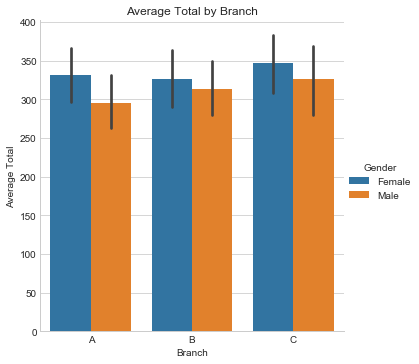

In [15]:
sns.catplot(x='Branch', y='Total', hue='Gender', data=df, kind='bar')
plt.ylabel('Average Total')
plt.title('Average Total by Branch')
plt.show()

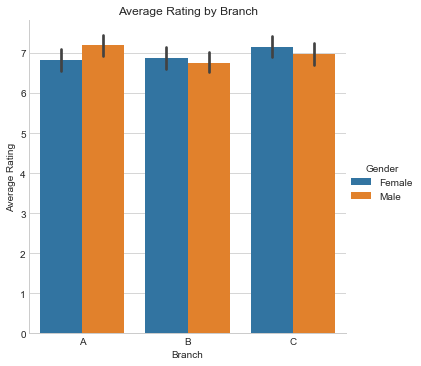

In [16]:
sns.catplot(x='Branch', y='Rating', hue='Gender', data=df, kind='bar')
plt.ylabel('Average Rating')
plt.title('Average Rating by Branch')
plt.show()

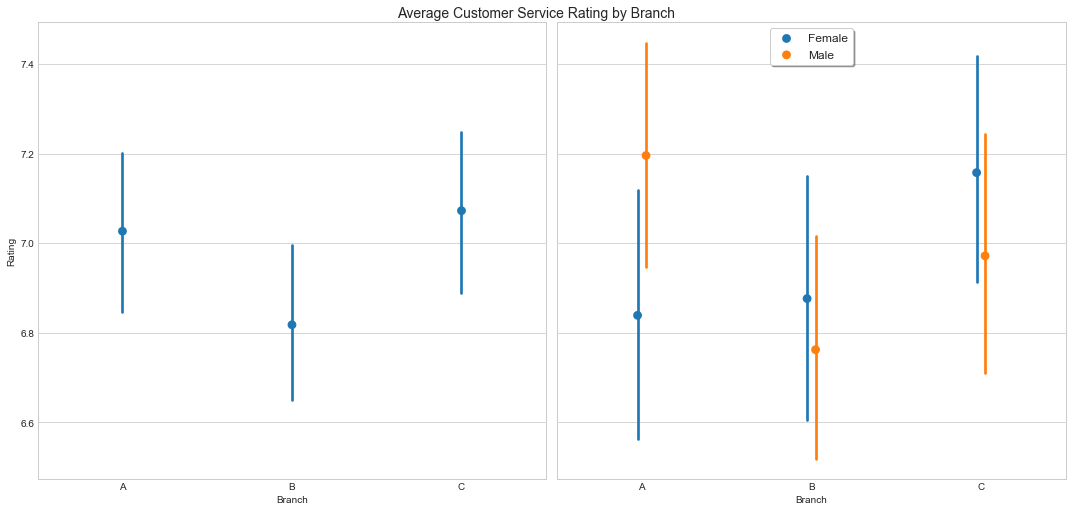

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7), sharey=True)
sns.pointplot(x='Branch', y='Rating', data=df, join=False, ax=ax1)
sns.pointplot(x='Branch', y='Rating', hue='Gender', data=df, join=False, dodge=True, ax=ax2)
ax2.set_ylabel(None)
ax2.legend(loc='upper center', frameon=True, framealpha=1, shadow=True, facecolor='white', fontsize=12)
plt.suptitle('Average Customer Service Rating by Branch', fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

In [18]:
df.Rating.mean()

6.9727

Looks like we may have a problem with the ratings, both overall and perhaps in particular with Female shoppers in Branch A. 

- What if we want to increase our average ratings for all stores to 8 - how could we go about doing that?

- What if we want to get our Female averages up to par in comparison to the other two branches - how could we set out to solve that?

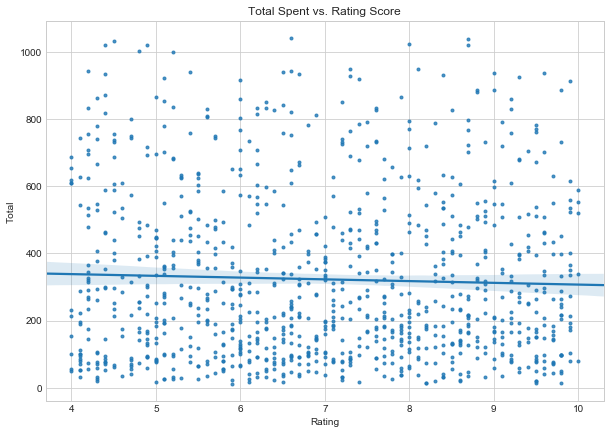

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('seaborn-white')
sns.regplot(x='Rating', y='Total', marker='.', data=df, ax=ax)
plt.title('Total Spent vs. Rating Score')
plt.show()

It doesn't seem that rating has anything to do with how much a customer purchases in a given trip. However, it would make sense that a customer that rated their experience more highly would be more likely to return (loyal customers generally lead to more consistent sales).

In [20]:
def df_month(month_number):
    return df[df.Datetime.dt.month == month_number]
def stat_by_month(month_number, column):
    return df_month(month_number).groupby('Branch')[column].agg(stat_list)

In [21]:
stat_by_month(1, 'Total')

,sum,mean,median,min,max,std
Branch,,,,,,
A,38681.1285,325.051500,277.67250,12.6945,931.035,223.498970
B,37176.0585,334.919446,285.70500,18.6375,1022.385,250.309706
C,40434.6810,331.431811,257.51775,13.4190,1034.460,267.954046


In [22]:
stat_by_month(2, 'Total')

,sum,mean,median,min,max,std
Branch,,,,,,
A,29860.1205,317.660856,233.80875,19.2465,1039.290,253.065574
B,34424.2710,315.819000,256.41000,30.9960,853.146,219.594327
C,32934.9825,329.349825,273.42525,10.6785,1042.650,263.552870


In [23]:
stat_by_month(3, 'Total')

,sum,mean,median,min,max,std
Branch,,,,,,
A,37659.1215,296.528516,217.18200,16.2750,951.825,223.356128
B,34597.3425,308.904844,219.88575,26.7225,1022.490,256.730525
C,37199.0430,350.934368,297.10800,17.0940,943.299,259.146082


In [24]:
stat_by_month(1, 'Rating')

,sum,mean,median,min,max,std
Branch,,,,,,
A,842.3,7.078151,7.0,4.0,9.9,1.708858
B,755.0,6.801802,6.7,4.0,9.9,1.843514
C,872.9,7.154918,7.1,4.0,9.9,1.725267


In [25]:
stat_by_month(2, 'Rating')

,sum,mean,median,min,max,std
Branch,,,,,,
A,658.7,7.007447,7.05,4.1,10.0,1.805978
B,763.9,7.008257,7.00,4.1,10.0,1.626296
C,720.0,7.200000,7.25,4.0,10.0,1.706790


In [26]:
stat_by_month(3, 'Rating')

,sum,mean,median,min,max,std
Branch,,,,,,
A,888.2,6.993701,7.20,4.0,9.9,1.708464
B,744.7,6.649107,6.50,4.0,10.0,1.658828
C,727.0,6.858491,6.85,4.0,9.9,1.673882
